In [7]:
import math
import os
import sys
import argparse

import pandas as pd
import numpy as np

sys.path.append('../..')

from src.IO.IO import IO
from src.util import get_config

%matplotlib inline
import matplotlib.pyplot as plt
from src.prg.prg.prg import create_prg_curve, plot_prg, calc_auprg, plot_pr
plt.rcParams['figure.figsize'] = (6,5)

In [11]:
# absolute path to the config folder
path = "../../src/config_files/"
cfg_filename = "config_mki.yaml"
fn = path + '/' + cfg_filename
if os.path.exists(fn):
    cfg = get_config(fn)
else:
    print("Config file {} couldn't be found at {}, exiting".format(args.configfn, fn))
    exit()

Reading config file


In [16]:
io = IO(cfg, 'pipeline')
ad = cfg["pipeline"]["anomaly_detection"]["anomaly_detector"]

# get filenames
stats_path = io.grid_search_statistics_path
fn = "grid_search_statistics_B1_iforestres.csv"
stats_csv = io.read_csv(fn, io.grid_search_statistics_path)

fns = []
for id in stats_csv['id']:
    fns.append("MKI_pipeline_2017_B1_iforest_{}.csv".format(id))

Reading grid_search_statistics_B1_iforestres.csv file


In [17]:
f_path = io.get_pipeline_output_path(ad)

dfs = []
for fn in fns:
    dfs.append(io.read_csv(fn, f_path))

Reading MKI_pipeline_2017_B1_iforest_31c3ffa4-93fc-49d5-ba13-522cf1bb8e06.csv file
Reading MKI_pipeline_2017_B1_iforest_6810746b-5de6-479f-9c41-abe99e4ef639.csv file
Reading MKI_pipeline_2017_B1_iforest_baad7419-0864-4448-b666-e0952a817ab8.csv file
Reading MKI_pipeline_2017_B1_iforest_a6e2ea03-5376-43a1-94fd-bf417a81aabc.csv file
Reading MKI_pipeline_2017_B1_iforest_598d8f74-6125-4b4f-b751-5f9946ec0052.csv file
Reading MKI_pipeline_2017_B1_iforest_332663bd-d240-4f57-aae7-90e780f918ba.csv file
Reading MKI_pipeline_2017_B1_iforest_a5732133-6e08-4f83-a292-e8965aec8fa1.csv file
Reading MKI_pipeline_2017_B1_iforest_fa3f883a-73a2-4556-a055-73af71f4ba2c.csv file
Reading MKI_pipeline_2017_B1_iforest_fc9292e9-7ea4-4897-9e49-5dc598ac1070.csv file
Reading MKI_pipeline_2017_B1_iforest_d6d97f6c-d76a-4142-a97e-dd0395a005b6.csv file
Reading MKI_pipeline_2017_B1_iforest_12cf43d4-c68b-4e91-bb38-ec44da7e61a7.csv file
Reading MKI_pipeline_2017_B1_iforest_7bc93e5c-ae35-4032-9e97-ea93768174eb.csv file
Read

In [18]:
labels_and_scores = []
for i, preds_and_truth_df in enumerate(dfs):
    sorted_df = preds_and_truth_df.sort_values(by="y_pred", ascending=False)
    labels = np.array(sorted_df["y_true"], dtype='int')
    scores = np.array(sorted_df["y_pred"])
    labels_and_scores.append({'labels':labels, 'scores':scores, 'id': stats_csv['id'][i], 'auc': stats_csv['auc'][i], 'auprg': stats_csv['auprg'][i]})

In [19]:
# add position
def get_index_of_first_true(l):
    for i in range(len(l)):
        if int(l[i]) == 1:
            return i
        elif i == len(l):
            print("No one in list")
            return None

for j in range(len(labels_and_scores)):
    labels_and_scores[j]['first_true_position'] = get_index_of_first_true(labels_and_scores[j]['labels'])

In [20]:
# add prg curves

for j in range(len(labels_and_scores)):
    labels_and_scores[j]['prg_curve'] = create_prg_curve(labels_and_scores[j]['labels'], labels_and_scores[j]['scores'])

In [21]:
# add auprg values

for j in range(len(labels_and_scores)):
    labels_and_scores[j]['auprg'] = calc_auprg(labels_and_scores[j]['prg_curve'])

In [22]:
first_true_positions = []
auprgs = []

for l_s in labels_and_scores:
    first_true_positions.append(l_s['first_true_position'])
    auprgs.append(l_s['auprg'])

In [23]:
print(first_true_positions)

[1, 0, 2, 9, 2, 10, 10, 15, 11, 14, 5, 4, 10, 10, 1, 9, 12, 11, 1, 1, 5, 13, 2, 10, 2, 12, 9, 0, 2, 1, 13, 10, 2, 13, 9, 7]


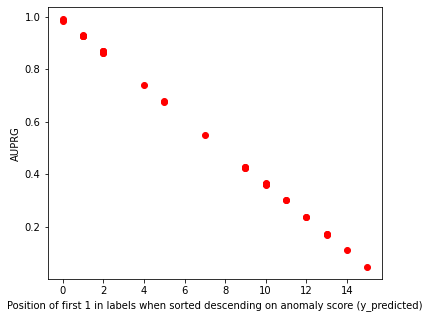

In [24]:
plt.plot(first_true_positions, auprgs, 'ro')
plt.xlabel("Position of first 1 in labels when sorted descending on anomaly score (y_predicted)")
plt.ylabel("AUPRG")
plt.show()

AUPRG:  0.9271205918202466


/home/thomas/Documents/git/anomaly-detection-abt-equipment/notebooks/MKI/../../src/prg/prg/prg.py:271: RuntimeWarning: invalid value encountered in double_scalars
  return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])


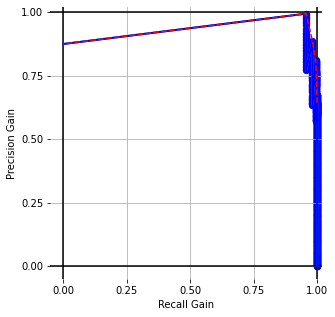

AUPR:  0.0421865284656475


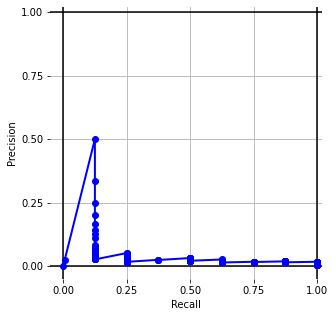

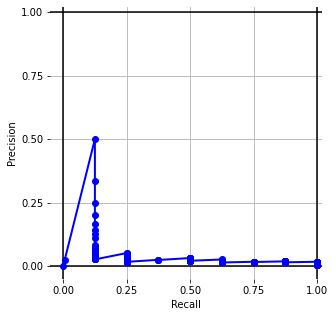

In [25]:
# example prg and pr curve
print("AUPRG: ", labels_and_scores[0]['auprg'])
plot_prg(labels_and_scores[0]['prg_curve'])
print("AUPR: ", labels_and_scores[0]['auc'])
plot_pr(labels_and_scores[0]['prg_curve'])

first TP position index: 0 | id: 6810746b-5de6-479f-9c41-abe99e4ef639
[1 0 0 ... 0 0 0]
AUPRG:  0.9896218268105672


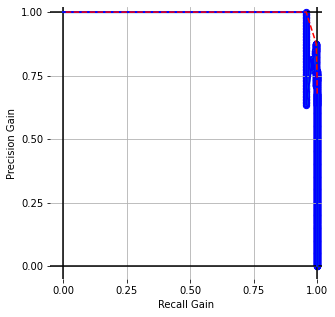

AUPR:  0.090868135061945


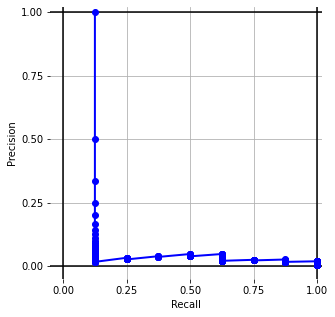

first TP position index: 0 | id: 8babfece-111f-45a7-9566-09338d4a14db
[1 0 0 ... 0 0 0]
AUPRG:  0.98521221587367


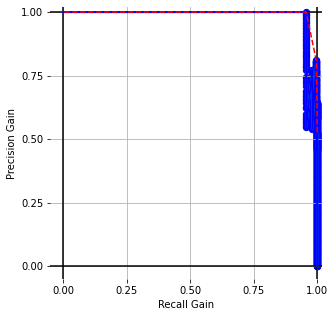

AUPR:  0.0822962774451088


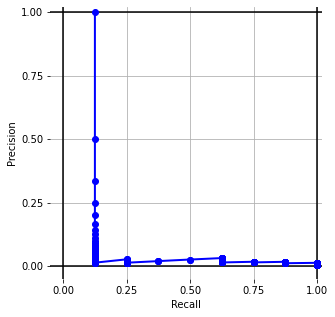

In [29]:
# add position
def get_index_of_first_true(l):
    for i in range(len(l)):
        if int(l[i]) == 1:
            return i
        elif i == len(l):
            print("No one in list")
            return None

# more prg curves

first_tp_index = 0

for i in range(len(labels_and_scores)):
    index_of_first_true = get_index_of_first_true(labels_and_scores[i]['labels'])
    if index_of_first_true == first_tp_index:
        print("first TP position index: {} | id: {}".format(get_index_of_first_true(labels_and_scores[i]['labels']), labels_and_scores[i]['id']))
        print(labels_and_scores[i]['labels'])
        print("AUPRG: ", labels_and_scores[i]['auprg'])
        plot_prg(labels_and_scores[i]['prg_curve'])
        print("AUPR: ", labels_and_scores[i]['auc'])
        plot_pr(labels_and_scores[i]['prg_curve'])